In [164]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
#importing data for diwali sales
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
df.shape

(11251, 15)

In [166]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [168]:
#Dropping irrelevant columns
df.drop(['Status', 'unnamed1'], axis =1, inplace = True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [170]:
#checking if null values are present
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [171]:
#handling null values
df.dropna(inplace = True)
df.shape
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [172]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [173]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [174]:
#Exploratory data analysis
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

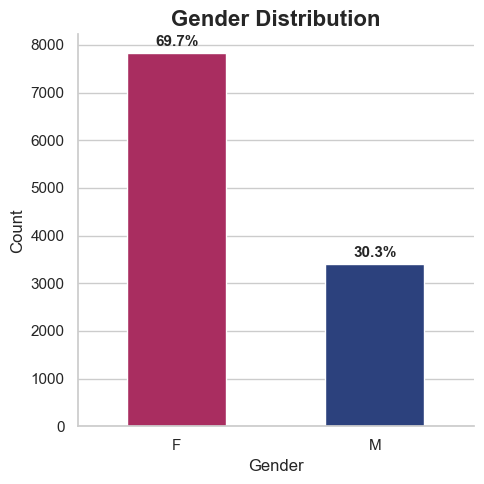

In [184]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))

# Custom palette
palette = [ "#BE185D", "#1F3A8A"]  # deep pink & soft blue

ax = sns.countplot(x='Gender', data=df, width=0.5, palette=palette,hue='Gender')
# Total count
total = len(df)
# Add count + percentage labels
for container in ax.containers:
    labels = []
    for bar in container:
        count = int(bar.get_height())
        percent = (count / total) * 100
        labels.append(f"{percent:.1f}%")
    ax.bar_label(container, labels=labels, fontsize=11, fontweight='semibold', padding=3)


# Titles and labels
plt.title("Gender Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Remove top and right borders
sns.despine()

plt.tight_layout()
plt.show()

Female customers dominate the dataset (~70%), indicating a skewed gender distribution.

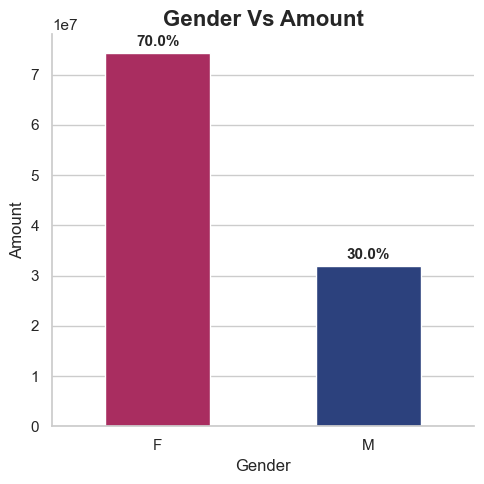

In [204]:
plt.figure(figsize=(5,5))

sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax1=sns.barplot(x='Gender', y='Amount', data=sales_gen, width=0.5, palette=palette,hue='Gender' )

# Total count
total1 = sales_gen['Amount'].sum()

# Add count + percentage labels
for container in ax1.containers:
    labels = []
    for bar in container:
        count = int(bar.get_height())
        percent = (count / total1) * 100
        labels.append(f"{percent:.1f}%")
    ax1.bar_label(container, labels=labels, fontsize=11, fontweight='semibold', padding=3)

# Titles and labels
plt.title("Gender Vs Amount", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Amount", fontsize=12)

# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()


From above plot we can observe that females have spent the most amount in the diwali sale.

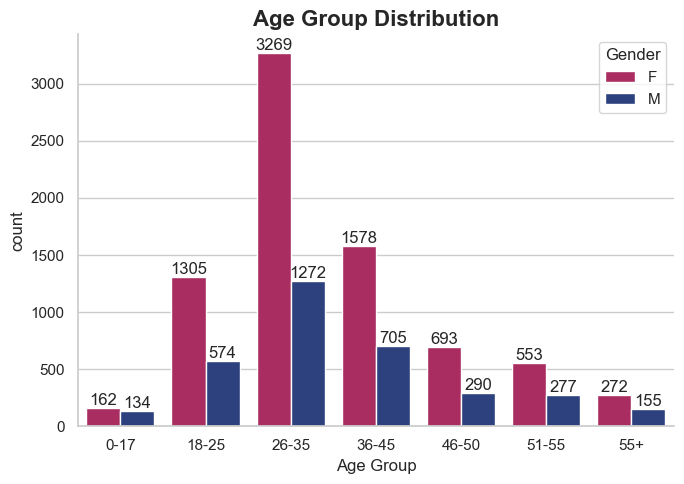

In [185]:
age_order = ['0-17', '18-25', '26-35', '36-45', 
             '46-50', '51-55', '55+']

plt.figure(figsize=(7,5))

ax = sns.countplot(
    data=df,
    x='Age Group',
    hue='Gender',
    palette=palette,
    order=age_order
)

for bars in ax.containers:
    ax.bar_label(bars)

# Titles and labels
plt.title("Age Group Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)

# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\1531650332.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(x='Age Group', y='Amount', data=sales_age,width=0.4, palette='deep', order=age_order)


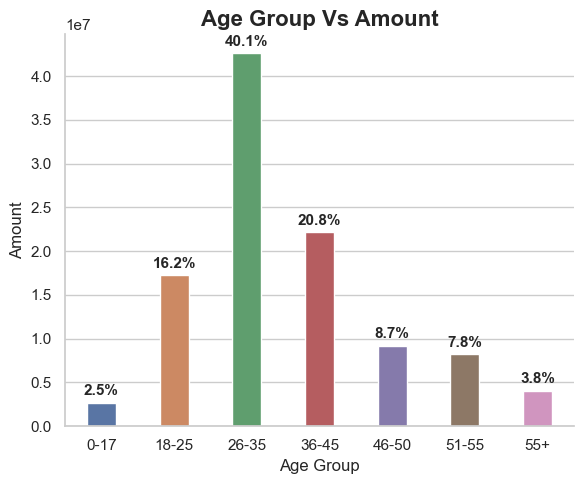

In [191]:
plt.figure(figsize=(6,5))
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax2=sns.barplot(x='Age Group', y='Amount', data=sales_age,width=0.4, palette='deep', order=age_order)

total2 = sales_age['Amount'].sum()

# Add count + percentage labels
for container in ax2.containers:
    labels = []
    for bar in container:
        count = int(bar.get_height())
        percent = (count / total2) * 100
        labels.append(f"{percent:.1f}%")
    ax2.bar_label(container, labels=labels, fontsize=11, fontweight='semibold', padding=3)

# Titles and labels
plt.title("Age Group Vs Amount", fontsize=16, fontweight='bold')

# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()



From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\2587102816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax7=sns.barplot(data=sales_state,x='State',y='Orders', width=0.7,palette = 'deep')


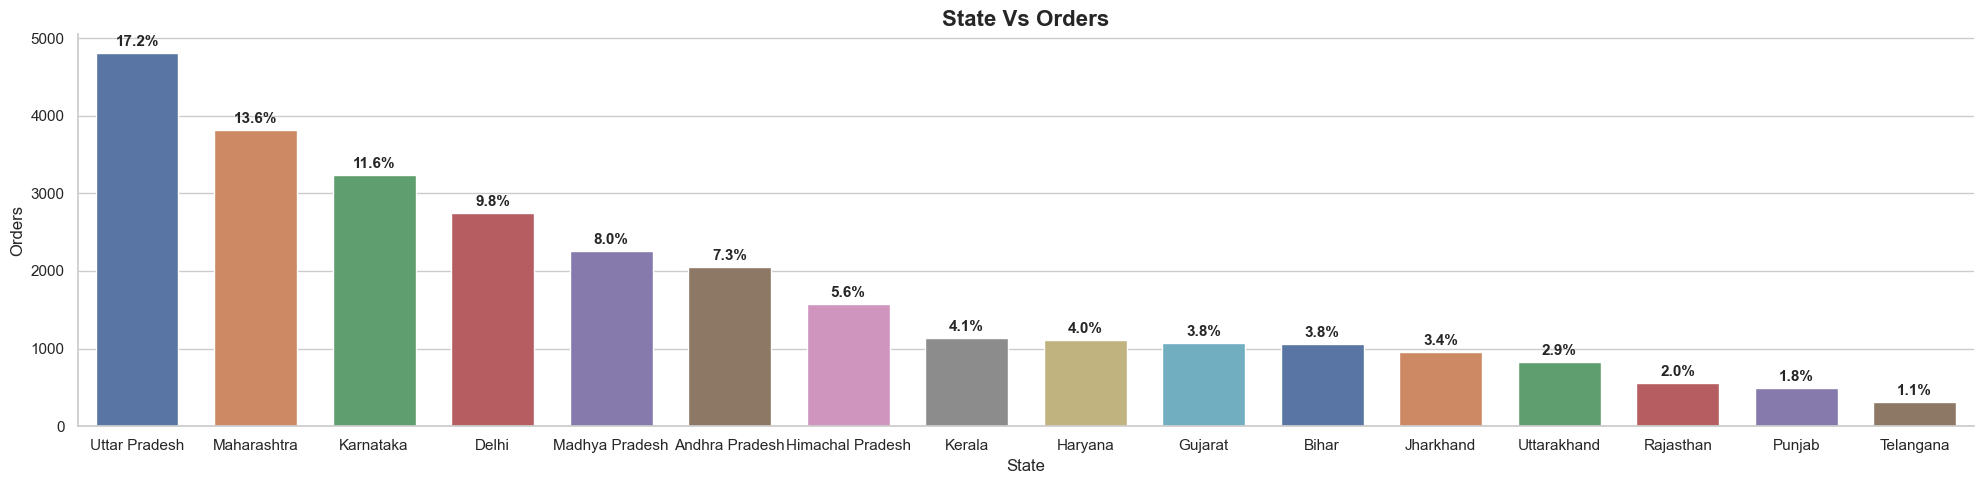

In [201]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
sales_state= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
#sns.set(rc={'figure.figsize':(20,5)})
ax7=sns.barplot(data=sales_state,x='State',y='Orders', width=0.7,palette = 'deep')
total7 = sales_state['Orders'].sum()
# Add count + percentage labels
for container in ax7.containers:
    labels = []
    for bar in container:
        count = int(bar.get_height())
        percent = (count / total7) * 100
        labels.append(f"{percent:.1f}%")
    ax7.bar_label(container, labels=labels, fontsize=11, fontweight='semibold', padding=3)


# Titles and labels
plt.title("State Vs Orders", fontsize=16, fontweight='bold')



# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()
            

The state of Uttar Pradesh has the hihest number of orders accounting for ~43% of total orders

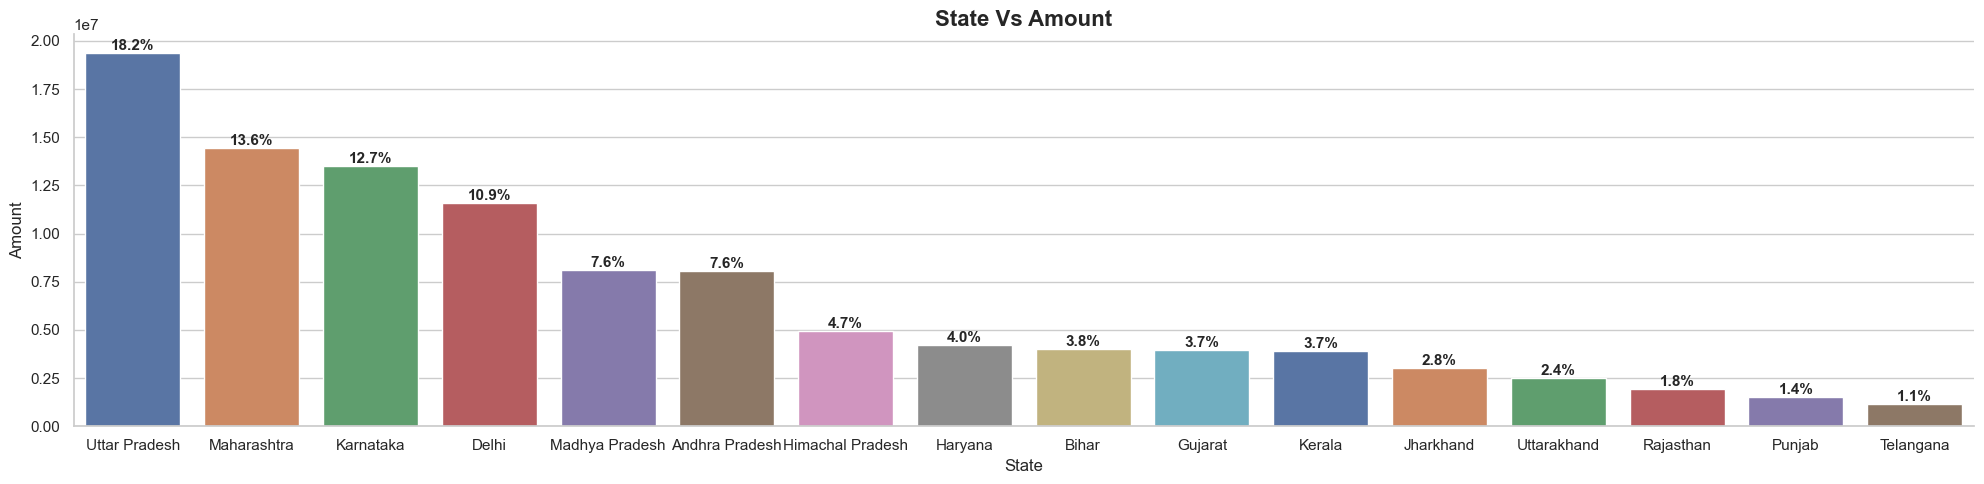

In [192]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
sales_state= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax3 = sns.barplot(data=sales_state,x='State',y='Amount',hue='State', palette = 'deep')

total3 = sales_state['Amount'].sum()
for container in ax3.containers:
    labels = []
    for bar in container:
        value = bar.get_height()
        percent = (value / total3) * 100
        labels.append(f"{percent:.1f}%")
    ax3.bar_label(container, labels=labels, fontsize=11, fontweight='semibold')

# Titles and labels
plt.title("State Vs Amount", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()
            

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\1901957064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(data=df,x='Marital_Status', palette = palette, width=0.5)


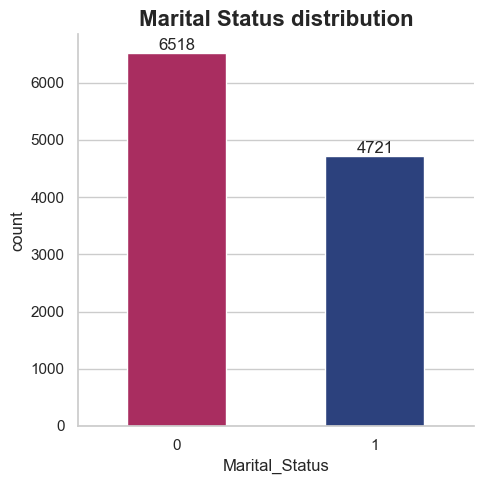

In [207]:
plt.figure(figsize=(5,5))
a=sns.countplot(data=df,x='Marital_Status', palette = palette, width=0.5)

for bars in a.containers:
    a.bar_label(bars)

plt.title("Marital Status distribution", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

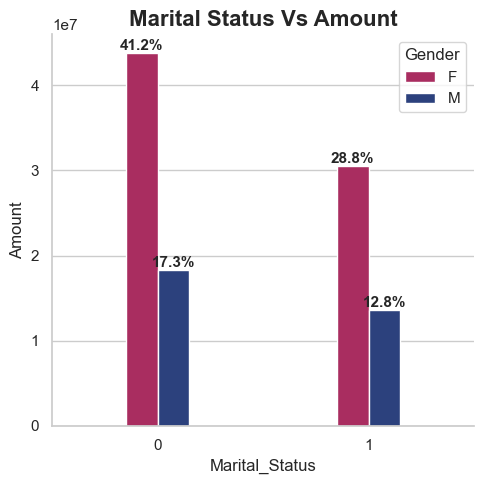

In [216]:
plt.figure(figsize=(5,5))

sales_state= df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
#sns.set(rc={'figure.figsize':(6,5)})
ax4= sns.barplot(data=sales_state,x='Marital_Status',y='Amount', palette = palette,width=0.3, hue='Gender' )

total4 = sales_state['Amount'].sum()
for container in ax4.containers:
    labels = []
    for bar in container:
        value = bar.get_height()
        percent = (value / total4) * 100
        labels.append(f"{percent:.1f}%")
    ax4.bar_label(container, labels=labels, fontsize=11, fontweight='semibold'
                 )
#Titles and labels   
plt.title("Marital Status Vs Amount", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\549773999.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x='Occupation',palette='deep')


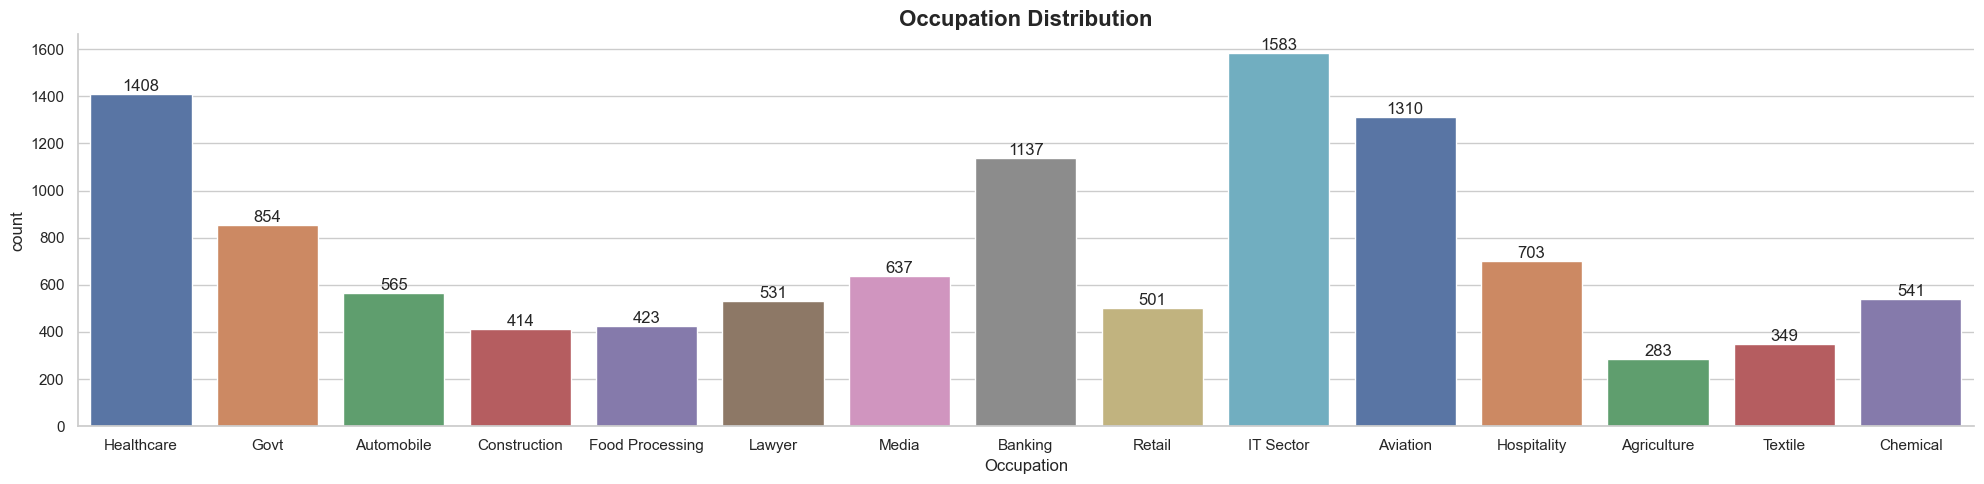

In [208]:
ax = sns.countplot(data=df,x='Occupation',palette='deep')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Occupation Distribution", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\699170694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5=sns.barplot(data=sales_occ, x='Occupation',y='Amount', palette='deep', width=0.5)


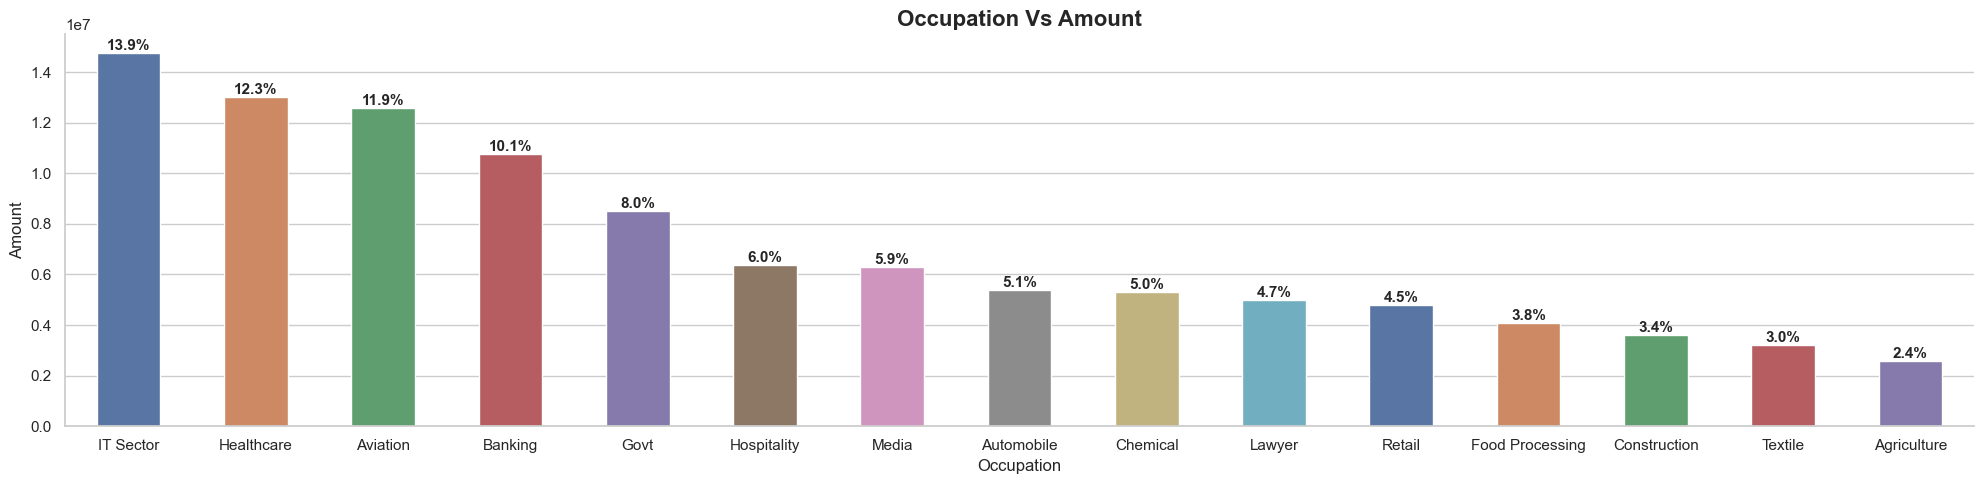

In [195]:
sales_occ = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax5=sns.barplot(data=sales_occ, x='Occupation',y='Amount', palette='deep', width=0.5)

total5 = sales_state['Amount'].sum()
for container in ax5.containers:
    labels = []
    for bar in container:
        value = bar.get_height()
        percent = (value / total5) * 100
        labels.append(f"{percent:.1f}%")
    ax5.bar_label(container, labels=labels, fontsize=11, fontweight='semibold')

 
plt.title("Occupation Vs Amount", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\1825784966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x='Product_Category',palette='deep')


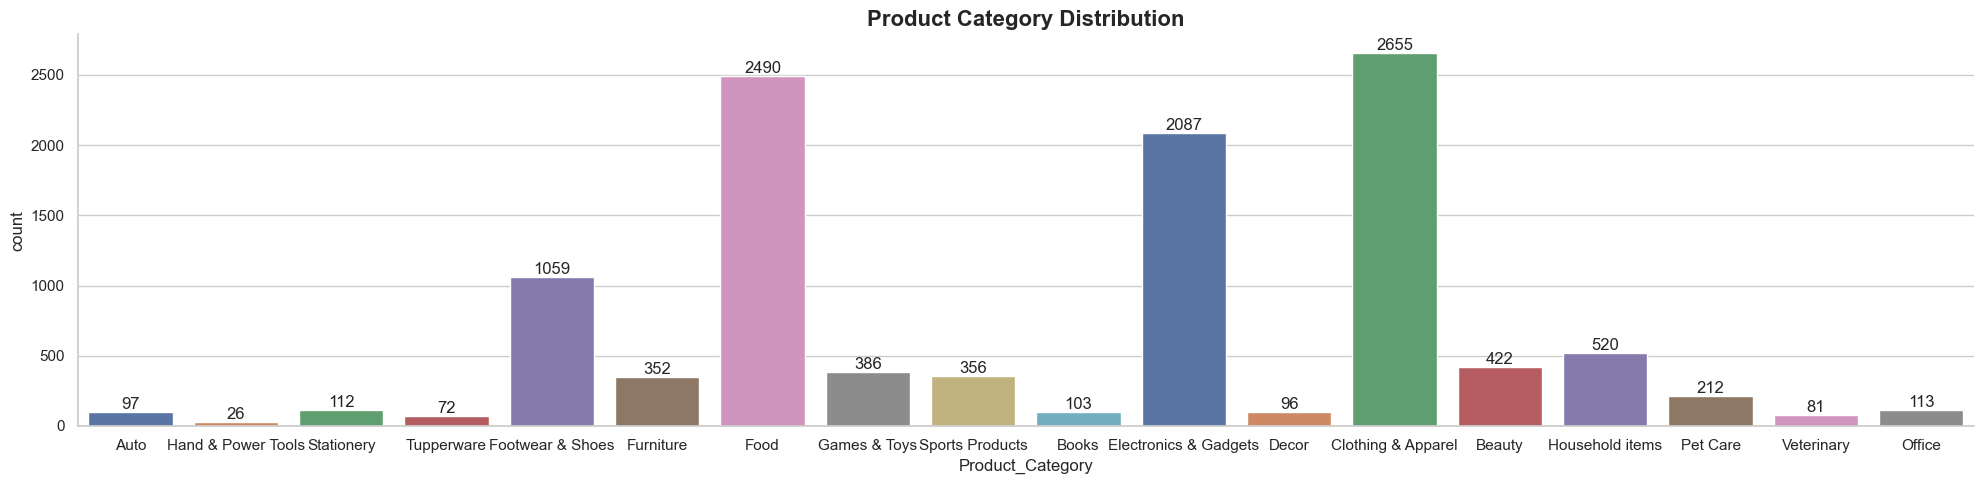

In [209]:
ax = sns.countplot(data=df,x='Product_Category',palette='deep')

for bars in ax.containers:
    ax.bar_label(bars)


plt.title("Product Category Distribution", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\3752714269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6=sns.barplot(data=sales_pc, x='Product_Category',y='Amount',palette='deep', width=0.5 )


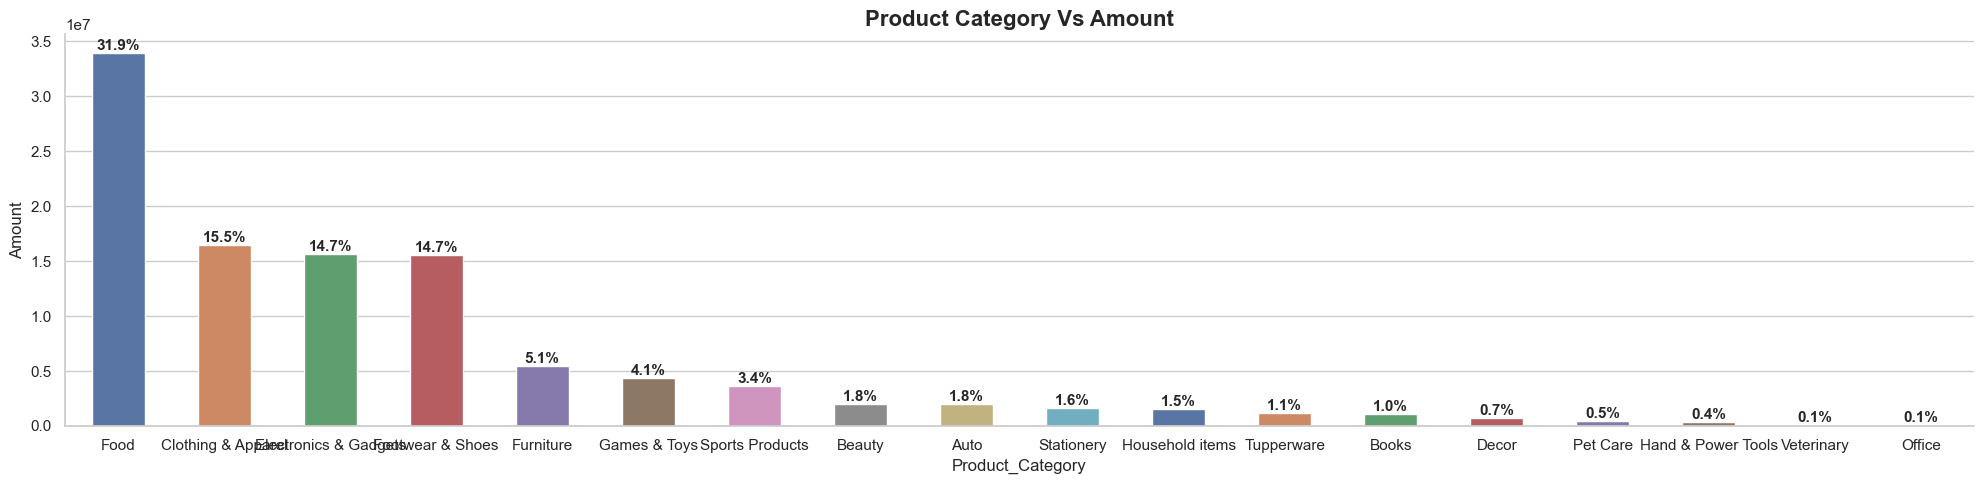

In [213]:
sales_pc = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax6=sns.barplot(data=sales_pc, x='Product_Category',y='Amount',palette='deep', width=0.5 )

total6 = sales_pc['Amount'].sum()
for container in ax6.containers:
    labels = []
    for bar in container:
        value = bar.get_height()
        percent = (value / total6) * 100
        labels.append(f"{percent:.1f}%")
    ax6.bar_label(container, labels=labels, fontsize=11, fontweight='semibold')

plt.title("Product Category Vs Amount", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

C:\Users\snigd\AppData\Local\Temp\ipykernel_8524\3364613543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax8=sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette= 'deep')


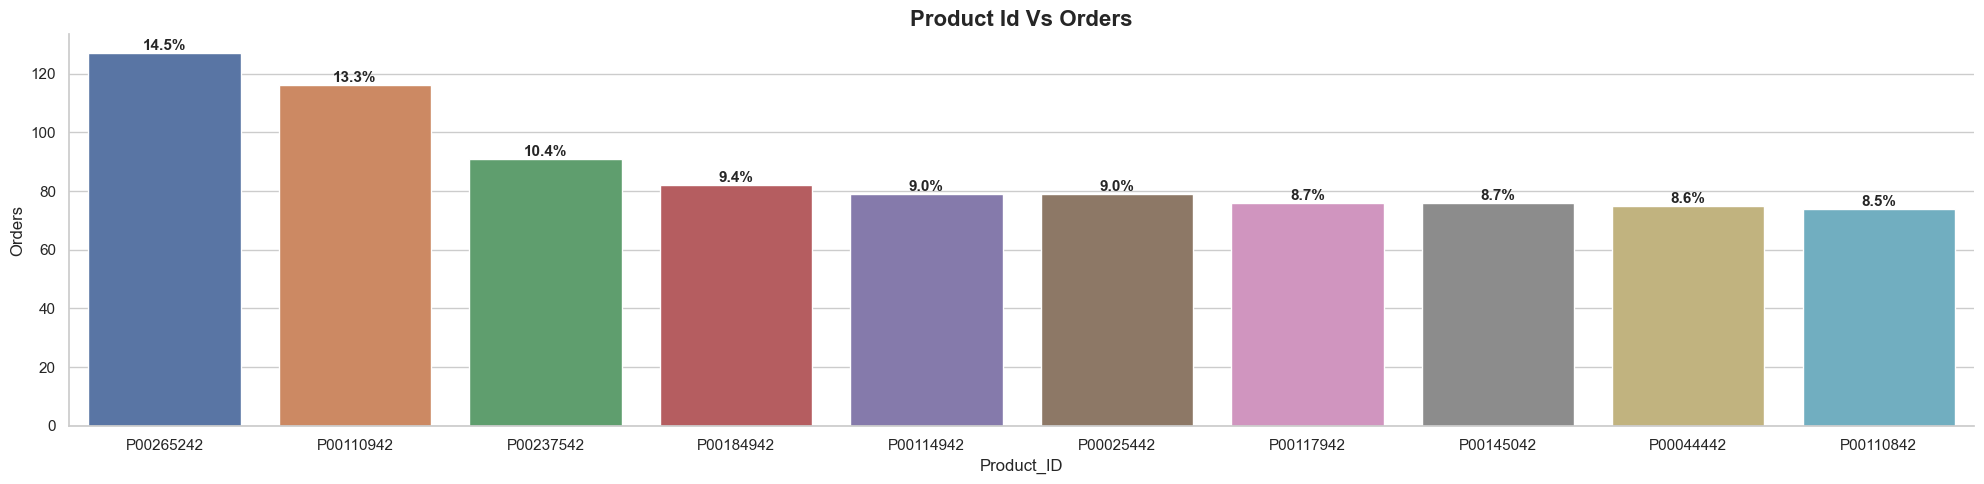

In [214]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
ax8=sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette= 'deep')

total8 = sales_state['Orders'].sum()
for container in ax8.containers:
    labels = []
    for bar in container:
        value = bar.get_height()
        percent = (value / total8) * 100
        labels.append(f"{percent:.1f}%")
    ax8.bar_label(container, labels=labels, fontsize=11, fontweight='semibold')

 
plt.title("Product Id Vs Orders", fontsize=16, fontweight='bold')
# Remove top and right borders
sns.despine()
plt.tight_layout()
plt.show()

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category